In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy.integrate as integrate
from matplotlib.patches import Rectangle 
import scipy.special as sp
import matplotlib.patches as patches
import math
%matplotlib inline

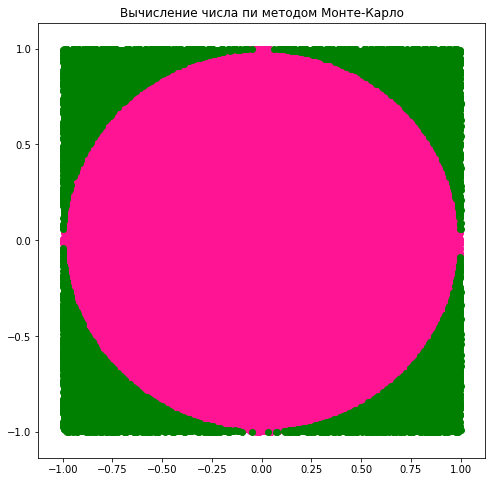

Пи = 3.13196


In [3]:
R_1 = sts.uniform(loc=-1,scale=2)
R_2 = sts.uniform(loc=-1,scale=2)
n = 100000
s_1 = R_1.rvs(n)
s_2 = R_2.rvs(n)
tr = (s_1**2  + s_2**2)<1 

fig, ax = plt.subplots()

ax.scatter(s_1[tr], s_2[tr],
           c = 'deeppink')    

l = (tr==False)
ax.scatter(s_1[l], s_2[l], c = 'green')

ax.set_facecolor('white')   
ax.set_title('Вычисление числа пи методом Монте-Карло')  

fig.set_figwidth(8)     
fig.set_figheight(8)    

plt.show()
print('Пи = ',4*sum(tr)/n,sep='')

In [7]:
n = 100000
dim = np.array([2,3,4,5,6,7,8,9,10,20,30])
print('Вычисление объема методом Монте-Карло n-мерного шара для числа испытаний = {}'.format(n))
for k in dim:
    sample = np.zeros((k,n))
    for i in range(k):
        sample[i] = sts.uniform(loc=-1,scale = 2).rvs(n)
    tr = 0
    for i in range(n):
        tr += (np.sum(sample[:,i]**2)  < 1)
    print('k = {}'.format(k))
    print('Результат методом Монте-Карло: ', np.sum(tr)*(2**k)/n,'Значение по точной формуле: ', math.pi**(k/2)/sp.gamma(k/2+1))
        

Вычисление объема методом Монте-Карло n-мерного шара для числа испытаний = 100000
k = 2
Результат методом Монте-Карло:  3.14556 Значение по точной формуле:  3.141592653589793
k = 3
Результат методом Монте-Карло:  4.18096 Значение по точной формуле:  4.188790204786391
k = 4
Результат методом Монте-Карло:  4.96368 Значение по точной формуле:  4.934802200544679
k = 5
Результат методом Монте-Карло:  5.28864 Значение по точной формуле:  5.263789013914324
k = 6
Результат методом Монте-Карло:  5.11808 Значение по точной формуле:  5.167712780049969
k = 7
Результат методом Монте-Карло:  4.73216 Значение по точной формуле:  4.724765970331401
k = 8
Результат методом Монте-Карло:  3.94496 Значение по точной формуле:  4.058712126416768
k = 9
Результат методом Монте-Карло:  3.30752 Значение по точной формуле:  3.2985089027387064
k = 10
Результат методом Монте-Карло:  2.60096 Значение по точной формуле:  2.550164039877345
k = 20
Результат методом Монте-Карло:  0.0 Значение по точной формуле:  0.02580

# Моделирование распределения равномерного на круге с помощью равномерного на отрезке

$f_{X,Y} (x,y) = \left\{ \begin{matrix}\pi^{-1}, x^2+y^2 \leq 1  \\ 0, x^2+y^2 > 1 \end{matrix} \right.$

$f_X (x) = \int \limits_{-\infty}^{\infty} f_{X,Y} (x,y)dy = \int \limits_{-\sqrt{1-x^2}}^{\sqrt{1-x^2}} \pi^{-1}dy = 2\pi^{-1}\sqrt{1-x^2} $

$F_X (x) = \frac{1}{\pi}\left(x\sqrt{1-x^{2}} +\ \arcsin x\right)$

$F^{-1}_X(x) = \frac{2}{\pi}arcsin(x)$

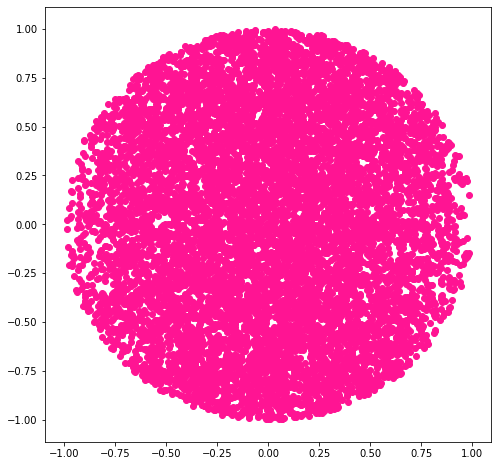

In [9]:
n = 10000
x = 2*np.arcsin(sts.uniform(loc=-1,scale=2).rvs(n))/math.pi
y = np.zeros(n)
for i in range(n):
    y[i] = sts.uniform(loc=-((1-x[i]**2)**0.5),scale =2*((1-x[i]**2)**0.5) ).rvs(1)
fig, ax = plt.subplots()

ax.scatter(x, y,
           c = 'deeppink') 
fig.set_figwidth(8)     
fig.set_figheight(8)    

plt.show()
